## Part 1 : DATA CLEANING 

### Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
data = pd.read_csv(r"E:\pc\ds_new_folder\sample datasets\ML Project\real_estate\bengaluru_house_prices.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Grouping by area_type to count unique areas in data

In [3]:
area_type = data.groupby("area_type")
area_type['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**Here you find the several areas in the dataset, we cannot implement oneHotEncoder here, so that for simplicity we ignore for now.**

In [4]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

###  Drop unnesassary columns for simplicity

In [5]:
data.drop(columns=['area_type', 'availability', 'society','balcony'], inplace=True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Get null count

In [6]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#here we ignoring the impact of null rows of location and size 

data.dropna(subset=['size', 'location'], inplace =  True)

In [8]:
data.isnull().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

In [9]:
# add mean value for bathroom na value

data.bath.fillna(data.bath.mean(), inplace=True)



C:\Users\Kishor\AppData\Local\Temp\ipykernel_25716\1923020346.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.bath.fillna(data.bath.mean(), inplace=True)


### Manage Size Column

In [10]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
data['bhk'] = data['size'].apply(lambda x: int(x.split()[0]))

In [12]:
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
data[data['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


*Here you find that 27 BHK and 43 Bedroom not possible in given sq_ft area , for now we ignore it , we'll handle it in next section.*

In [14]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#function to convert float value 

def is_float(x):
    try:
        float(x) #convert here 
    except:
        return False #if not convert, return false
    return True #all okay, return true

### Manage 'total_sqft' column

In [16]:


data[~data['total_sqft'].apply(is_float)] #non float value

#here '~' is work like '!' (return negative response)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.000000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.692586,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.692586,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.000000,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.000000,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.000000,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.692586,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.000000,59.135,2


In [17]:
#convert total_sqft range in to mean 

def convert_range_into_mean(x):
    token = x.split('-') #split by '-' to each cell
    if len(token) == 2 :
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None
    

In [18]:
#copying the original data

data2 = data.copy()

In [19]:
data2['total_sqft'] = data2['total_sqft'].apply(convert_range_into_mean)

In [20]:
#check range row 
data2['total_sqft'].loc[56]


3210.0

## Part 2 :  Feature Engineering

In [21]:
#copying the dataset
data3 = data2.copy()


### Add new column of price_per_sqft

In [22]:

data3['price_per_sqft'] = data3.price * 100000  / data3.total_sqft


In [23]:
data3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [24]:
data3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
#find the unique value in the dataset
data3.location.nunique()

1304

In [26]:
data3.location = data3.location.apply(lambda x : x.strip()) # strip function to remove unnessosary spaces

In [27]:
location_states = data3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_states

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_states[location_states <= 10])

1052

**Here is not possible to apply oneHotEncoder (dummies column), because we will get new 1052 columns in the dataset, which not good practice**

### MANAGE LOCATION

In [29]:
#we create new category -"others" which include loaction which unique count is less then 10.

location_states_less_then_10 = location_states[location_states <= 10]

In [30]:
#this much row we will replace by category "others" for simplycity

data3.location = data3.location.apply(lambda x : 'others' if x in location_states_less_then_10 else x)



In [31]:
data3.location.nunique()

242

In [32]:
data3.shape


(13303, 7)

## Part 3 : Outlier removal

**Note:**  
1. To remove the outlier you need the domain knowledge, so can it help you to get the unusaul data in dataset.
2. If have not that much deep domain knowledge, then you should learn.
3. In the case of emergency, you should ask to your manager (your domain expert) with your data, he will suggest the best regarding outliers.

In [33]:
data4 = data3.copy()
data4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


### Compare bhk to total_sq_ft 

In [34]:
#In geneal size 1 bhk consumes atleast 300 sqft in Bangaluru, so we going to remove area less then 300 sqft / 1 bhk


data4[data4.total_sqft/data4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
data5 = data4[~(data4.total_sqft/data4.bhk < 300)]


In [36]:
data5.shape

(12559, 7)

### Compare price_per_sqft_area



In [37]:
data5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

*Here max price is 176k/sqft is possible in prime location but in our case we are building a generic model so we consider as outlier* 

***Here as per location we set outlier because price per sqft varies with location***

In [38]:
#function to remove outlier as per location

def remove_pps_outlier(df):
    df_no_out = pd.DataFrame() #create empty dataframe

    for key, subdata in df.groupby('location'): #create subdf of location
        m = subdata.price_per_sqft.mean() #get mean 
        st = subdata.price_per_sqft.std() #get standard deviation 

        reduced_df = subdata[(subdata.price_per_sqft > m-st) & (subdata.price_per_sqft <= m+st)]
        df_no_out = pd.concat([df_no_out, reduced_df], ignore_index=True)
    return df_no_out

In [39]:
data6 = remove_pps_outlier(data5)


In [40]:
data6.shape

(10337, 7)

### Compare price per sqft for 2 bhk and 3 bhk

In [41]:


def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = "red", marker = '*', label = '3 BHK', s = 50)
    
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

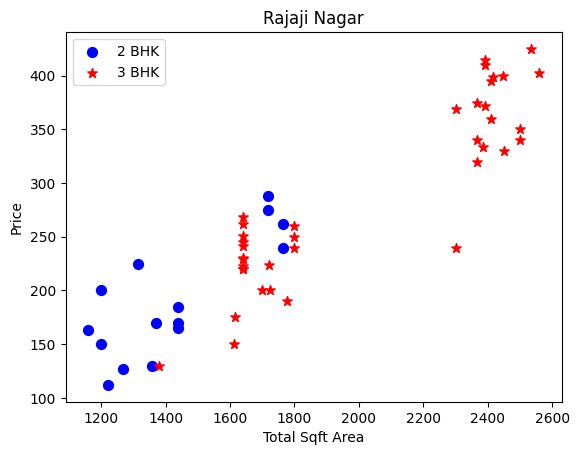

In [42]:
plot_scatter_chart(data6, 'Rajaji Nagar')

**Here you can notice that at approx 1700 total sqft area price of 2bhk is higher than 3bhk, we not not practically correct**

### Compare bhk prices and remove as outlier

In [43]:
import numpy as np

In [44]:
def remove_bhk_outlier(df):
    ex_indices =  np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)

            if stats and stats['count'] > 5 :
                ex_indices = np.append(ex_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(ex_indices, axis = 'index')



In [45]:
data7 = remove_bhk_outlier(data6)

In [46]:
data6.shape

(10337, 7)

In [47]:
data7.shape

(7409, 7)

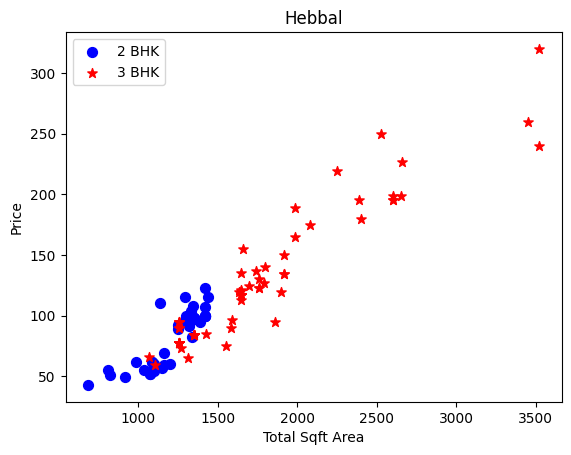

In [48]:
plot_scatter_chart(data6, 'Hebbal')

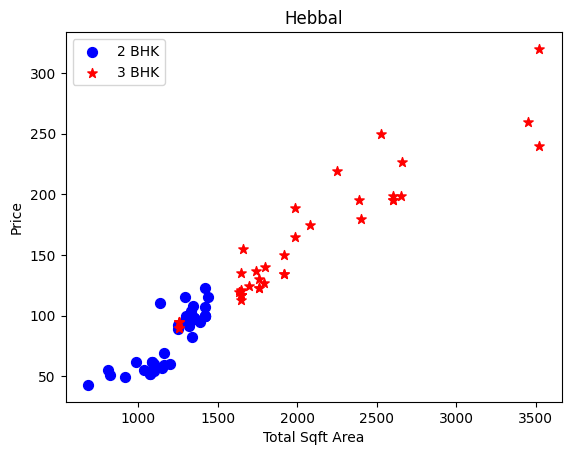

In [49]:
plot_scatter_chart(data7, 'Hebbal')

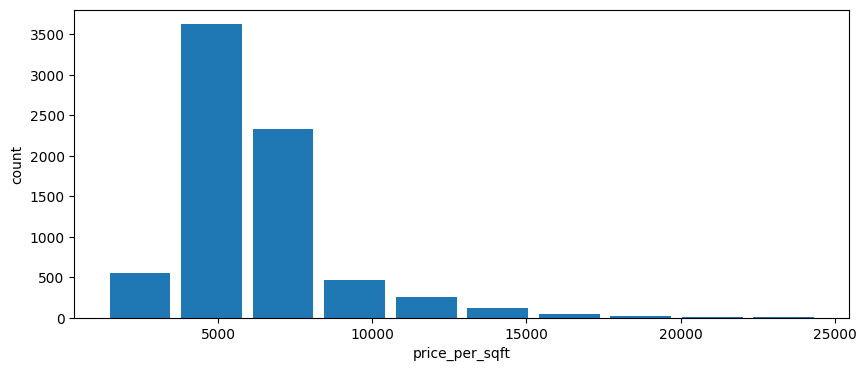

In [50]:
plt.figure(figsize = (10,4))
plt.hist(data7.price_per_sqft, rwidth=0.85)
plt.xlabel('price_per_sqft') 
plt.ylabel('count')
plt.show()

### compare bathroom


***Generally if you have 2 bhk flat the might be you have 2+2=  bath romms.***

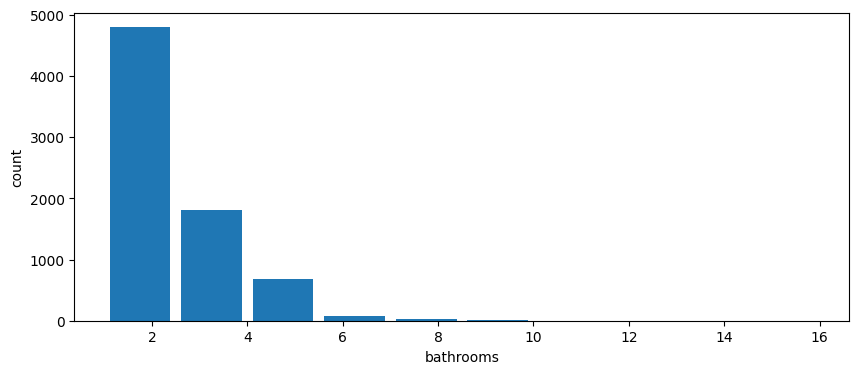

In [51]:
plt.figure(figsize = (10,4))
plt.hist(data7.bath, rwidth=0.85)
plt.xlabel('bathrooms') 
plt.ylabel('count')
plt.show()

In [52]:
data7[data7.bath > data7.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1641,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5303,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6793,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8505,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
data8 = data7[data7.bath < data7.bhk + 2]

In [54]:
data8.shape

(7331, 7)

### Now move to ML Model where we did not need to size and price_per_sqft

In [55]:
data9 = data8.drop(columns = ["size", "price_per_sqft"])

In [56]:
data9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10328,others,1200.0,2.0,70.0,2
10329,others,1800.0,1.0,200.0,1
10332,others,1353.0,2.0,110.0,2
10333,others,812.0,1.0,26.0,1


## Part 4 : Model Building

### Use OneHotEncoding for categorical data


In [57]:
dummies = pd.get_dummies(data9.location)

In [58]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
data10 = pd.concat([data9, dummies.drop(columns=['others'])], axis='columns')


In [60]:
data10.drop(columns=["location"], inplace = True)

In [61]:
data10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# dependent variable and independent variable

X = data10.drop(columns=["price"])
y = data10.price


### Split into test, train data

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Use Linear Regression Model and get the score

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8786758075499228

#### Use K-Fold for getting multiple score and do cross validation

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [68]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [69]:
cross_val_score(LinearRegression(), X, y , cv = cv)

array([0.81756875, 0.84286693, 0.80496652, 0.87936824, 0.83345123])

#### Use GridCV for getting multiple score and do cross validation

In [71]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
LinearRegression()

In [72]:
def find_best_model(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        }
    }

    new_score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        clf = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)  # Raising errors for clarity
        clf.fit(X, y)
        new_score.append({
            "model": algo_name,
            "best_score": clf.best_score_,
            "best_params": clf.best_params_
        })
    return pd.DataFrame(new_score)

In [73]:
find_best_model(X,y)


,model,best_score,best_params
0,linear_regression,0.835644,{}
1,lasso,0.691694,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_regressor,0.698279,"{'max_depth': 20, 'min_samples_split': 10}"


### Prediction

In [75]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [76]:
X.columns.nunique()

244

***As you can see that 244 column, and it is hard to to type the each value in prediction equation for this we need to creat the function***

In [84]:
np.where(X.columns=='Yelenahalli')

(array([242], dtype=int64),)

In [85]:
np.where(X.columns=='Yelenahalli')[0]

array([242], dtype=int64)

In [86]:
np.where(X.columns=='Yelenahalli')[0][0]

242

In [96]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0] ##get the column index    
    x = np.zeros(len(X.columns))
    x[0] = sqft 
    x[1] = bath 
    x[2] = bhk 

    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [97]:
predict_price('Yelenahalli', 1000, 2, 2) # price in lakh

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.011493925090008

In [98]:
predict_price('Yelenahalli', 1000, 3, 2)

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.306751934395862

In [91]:
predict_price('Whitefield', 2000, 7, 5)[0]

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


139.814903704837

In [95]:
predict_price('Whitefield', 2000, 9, 6)[0]

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


141.71846054120797

### Export our ML model into file

In [99]:
import pickle

In [101]:
with open ('banglore_home_price_prediction', 'wb') as f:
    pickle.dump(lr, f)

In [102]:
import json

In [106]:
columns = {
    "data_columns" :  [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))